# Exploratory Data Analysis

In [12]:
%%html
<img src="pipeline.png" width=800 height=800 />

In [42]:
import pandas as pd
import numpy as np
import copy
import warnings
import xgboost as xgb
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
%matplotlib inline


# Objective fundamentals

In [14]:
df = pd.read_csv("fundamentals.csv")

In [19]:
df = df.drop(['Unnamed: 0'],axis=1)

In [23]:
df.index = np.arange(1,len(df)+1)

In [67]:
df.tail()

,Ticker Symbol,Period Ending,Accounts Payable,Accounts Receivable,Add'l income/expense items,After Tax ROE,Capital Expenditures,Capital Surplus,Cash Ratio,Cash and Cash Equivalents,...,Total Current Assets,Total Current Liabilities,Total Equity,Total Liabilities,Total Liabilities & Equity,Total Revenue,Treasury Stock,For Year,Earnings Per Share,Estimated Shares Outstanding
1777,ZION,2015-12-31,0.000000e+00,0.0,-2530000.0,4.0,-157361000.0,0.000000e+00,NaN,1.576313e+10,...,0.000000e+00,0.000000e+00,7.507519e+09,5.216201e+10,5.966952e+10,2.210591e+09,0.0,2015.0,1.20,2.578925e+08
1778,ZTS,2013-12-31,1.381000e+09,-99000000.0,9000000.0,54.0,-184000000.0,8.780000e+08,43.0,6.100000e+08,...,3.357000e+09,1.415000e+09,9.400000e+08,5.618000e+09,6.558000e+09,4.561000e+09,0.0,2013.0,1.01,4.990099e+08
1779,ZTS,2014-12-31,1.071000e+09,69000000.0,-7000000.0,44.0,-180000000.0,9.580000e+08,81.0,8.820000e+08,...,3.465000e+09,1.086000e+09,1.311000e+09,5.277000e+09,6.588000e+09,4.785000e+09,0.0,2014.0,1.16,5.025862e+08
1780,ZTS,2015-12-31,1.313000e+09,-58000000.0,-81000000.0,32.0,-224000000.0,1.012000e+09,65.0,1.154000e+09,...,3.830000e+09,1.781000e+09,1.068000e+09,6.845000e+09,7.913000e+09,4.765000e+09,-203000000.0,2015.0,0.68,4.985294e+08
1781,ZTS,2016-12-31,1.076000e+09,15000000.0,2000000.0,55.0,-216000000.0,1.024000e+09,65.0,7.270000e+08,...,3.390000e+09,1.117000e+09,1.487000e+09,6.162000e+09,7.649000e+09,4.888000e+09,-421000000.0,NaN,NaN,NaN


# Stock price dataframe

In [25]:
price = pd.read_csv("prices-split-adjusted.csv")
price.index = np.arange(1,len(price)+1)

In [26]:
price.head()

,date,symbol,open,close,low,high,volume
1,2016-01-05,WLTW,123.430000,125.839996,122.309998,126.250000,2163600.0
2,2016-01-06,WLTW,125.239998,119.980003,119.940002,125.540001,2386400.0
3,2016-01-07,WLTW,116.379997,114.949997,114.930000,119.739998,2489500.0
4,2016-01-08,WLTW,115.480003,116.620003,113.500000,117.440002,2006300.0
5,2016-01-11,WLTW,117.010002,114.970001,114.089996,117.330002,1408600.0


In [29]:
all_stocks = price.symbol.unique()

# Target stock study - Amazon

In [37]:
df_amz = df[df['Ticker Symbol'].isin(['AMZN'])]

In [39]:
price_amz = price[price.symbol=="AMZN"]

In [40]:
price_amz.shape

(1762, 7)

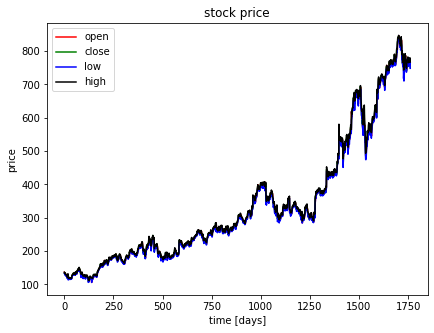

In [49]:
plt.figure(figsize=(15, 5));
plt.subplot(1,2,1);
plt.plot(price[price.symbol == 'AMZN'].open.values, color='red', label='open')
plt.plot(price[price.symbol == 'AMZN'].close.values, color='green', label='close')
plt.plot(price[price.symbol == 'AMZN'].low.values, color='blue', label='low')
plt.plot(price[price.symbol == 'AMZN'].high.values, color='black', label='high')
plt.title('stock price')
plt.xlabel('time [days]')
plt.ylabel('price')
plt.legend(loc='best')
plt.show()

In [51]:
df_amz.index = np.arange(1,len(df_amz)+1)

In [62]:
features = df_amz.columns

# Correlation 

In [63]:
df_amz.corr()

,Accounts Payable,Accounts Receivable,Add'l income/expense items,After Tax ROE,Capital Expenditures,Capital Surplus,Cash Ratio,Cash and Cash Equivalents,Changes in Inventories,Common Stocks,...,Total Current Assets,Total Current Liabilities,Total Equity,Total Liabilities,Total Liabilities & Equity,Total Revenue,Treasury Stock,For Year,Earnings Per Share,Estimated Shares Outstanding
Accounts Payable,1.000000,-0.976867,0.688130,0.898551,-0.941478,0.998470,0.375284,0.943587,-0.193176,NaN,...,0.997847,0.999866,0.982653,0.986125,0.996324,0.999561,NaN,0.999993,0.377539,0.957147
Accounts Receivable,-0.976867,1.000000,-0.779780,-0.970395,0.914387,-0.985584,-0.210225,-0.854311,0.122379,NaN,...,-0.965045,-0.978153,-0.999574,-0.928043,-0.955253,-0.978482,NaN,-0.949010,-0.647355,-0.819199
Add'l income/expense items,0.688130,-0.779780,1.000000,0.873108,-0.811152,0.696520,0.188272,0.543387,0.509855,NaN,...,0.688525,0.683533,0.771172,0.605462,0.651245,0.677969,NaN,-0.788314,-0.865490,-0.579403
After Tax ROE,0.898551,-0.970395,0.873108,1.000000,-0.858931,0.915893,0.060662,0.718359,0.026462,NaN,...,0.880271,0.900245,0.963513,0.815971,0.859828,0.900318,NaN,0.500000,0.990187,0.231414
Capital Expenditures,-0.941478,0.914387,-0.811152,-0.858931,1.000000,-0.929481,-0.562958,-0.930095,-0.123340,NaN,...,-0.956479,-0.936147,-0.921638,-0.938839,-0.945276,-0.931398,NaN,-0.749253,0.333929,-0.907377
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Total Revenue,0.999561,-0.978482,0.677969,0.900318,-0.931398,0.999270,0.352153,0.937329,-0.216234,NaN,...,0.995647,0.999910,0.983902,0.983588,0.994650,1.000000,NaN,0.998099,0.430521,0.938773
Treasury Stock,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
For Year,0.999993,-0.949010,-0.788314,0.500000,-0.749253,0.994500,0.500000,0.939528,-0.743355,NaN,...,0.992747,0.999336,0.967459,0.987668,0.995389,0.998099,NaN,1.000000,0.374071,0.958224
Earnings Per Share,0.377539,-0.647355,-0.865490,0.990187,0.333929,0.469146,-0.616117,0.033840,-0.898402,NaN,...,0.259866,0.407623,0.596555,0.224263,0.283388,0.430521,NaN,0.374071,1.000000,0.093191


In [66]:
df_amz.iloc[:,:10].head()

,Ticker Symbol,Period Ending,Accounts Payable,Accounts Receivable,Add'l income/expense items,After Tax ROE,Capital Expenditures,Capital Surplus,Cash Ratio,Cash and Cash Equivalents
1,AMZN,2013-12-31,2.182100e+10,-8.460000e+08,-98000000.0,3.0,-3.444000e+09,9.573000e+09,54.0,8.658000e+09
2,AMZN,2014-12-31,2.626600e+10,-1.039000e+09,-79000000.0,2.0,-4.893000e+09,1.113500e+10,62.0,1.455700e+10
3,AMZN,2015-12-31,3.076900e+10,-1.755000e+09,-206000000.0,4.0,-4.589000e+09,1.339400e+10,58.0,1.589000e+10
4,AMZN,2016-12-31,3.904800e+10,-3.367000e+09,190000000.0,12.0,-6.737000e+09,1.718600e+10,59.0,1.933400e+10
